#Algoritmo de clasificación con **K-means++** mediante la librería **sklearn**:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7dPZu3VcPsEfmQ7vrhVc38TPipvQo0Ol9rElCa9AJyEGwMV18iDB2SPg71GOeB4fFY7krDf0ake9i/pub?output=csv'
datos = pd.read_csv(url)
X = datos.values

##Método del codo:

Para comenzar, utilizando el método del codo (o agrupación) se podrá encontrar el número óptimo de *clusters* de los datos:

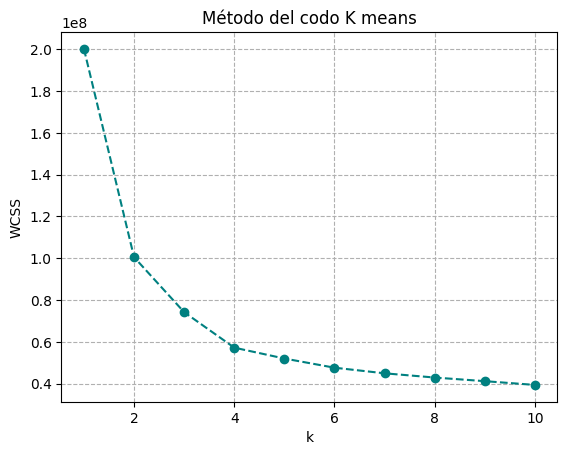

In [3]:
from sklearn.cluster import KMeans
# Se inicializa donde se almacena el WCCS(k)

WCSS = []

for k in range(1,11):
  kpp = KMeans(n_clusters= k,
               init = 'k-means++',
               random_state=42, n_init = 'auto')
  kpp.fit(X)
  WCSS.append(kpp.inertia_)

plt.figure()
plt.plot(range(1,11), WCSS, 'o--', color = 'teal')
plt.title('Método del codo K means')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(linestyle = '--')
plt.show()

Por análisis de la gráfica, se obitne que el número óptimo de *clusters* es de 4.

In [4]:
from sklearn.cluster import KMeans

kmeans_plus = KMeans(n_clusters = 4, random_state = 42, init = 'k-means++')
cluster_kmeans_plus = kmeans_plus.fit_predict(X)
cluster_kmeans_plus

array([0, 3, 3, ..., 0, 2, 0], dtype=int32)

In [5]:
centroides_kmeans_plus = kmeans_plus.cluster_centers_
centroides_kmeans_plus

array([[ 6.58039639e+01,  7.30671115e+01,  6.27686421e+01,
         5.75673077e+01,  6.65661303e+01,  3.32148744e+01,
         6.03475275e+01,  7.31840659e+01,  7.29531005e+01,
         6.43479199e+01,  6.40657378e+01,  6.51361852e+01,
         5.94497645e+01,  5.62496075e+01,  5.93618524e+01,
         5.92382261e+01,  5.41350078e+01,  4.98153454e+01,
         6.19599686e+01,  5.27468603e+01,  5.55781005e+01,
         6.64729199e+01,  7.11840659e+01,  6.95837912e+01,
         6.15011774e+01,  6.63779435e+01,  6.07388148e+01,
         2.95282575e+01,  5.47343014e+01,  3.09636970e+01,
         3.19097331e+01,  2.92580455e+01,  6.61291209e+01,
         6.34425039e+01,  6.21283359e+01,  5.04640895e+01,
         3.12715856e+00,  2.87519623e+00,  7.87284144e-01,
         2.47327316e+01,  1.58983937e-13,  9.32587341e-14,
         6.15507645e-13,  3.38395978e-13, -2.94875235e-13],
       [ 6.54262131e+01,  6.58829415e+01,  6.39144572e+01,
         6.30215108e+01,  6.67453727e+01,  3.58204102e+

##PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca= pca.fit_transform(X)

##Gráficas de la clusterización:

Se reduce la dimensión de los centroides mediante PCA.

In [7]:
centroides_kmeans_plus = pca.transform(centroides_kmeans_plus)
centroides_kmeans_plus

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

###Gráfica de K-means++ en dos dimensiones:

Se crea un gráfico de dispersión 2D del K-means++ usando las dos primeras componentes:

In [8]:
def graficar_clusters_PCA2D_plus(clusters, metodo, centroids):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='PuOr',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'Centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

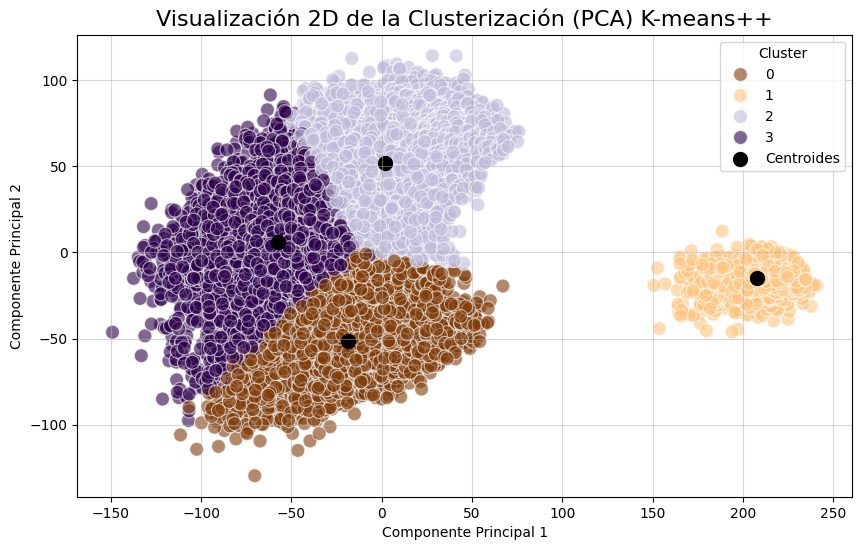

In [9]:
kmeans_2d = graficar_clusters_PCA2D_plus(cluster_kmeans_plus, 'K-means++', centroides_kmeans_plus)

###Gráfica de K-means++ en tres dimensiones:

Finalmente, realizaremos la función que generará la gráfica de K-means++ en 3d.

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D_plus(clusters, metodo):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                       c=clusters, cmap='PuOr',
                       alpha=0.6)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend1= ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
    ax.add_artist(legend1)
    plt.title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.show()

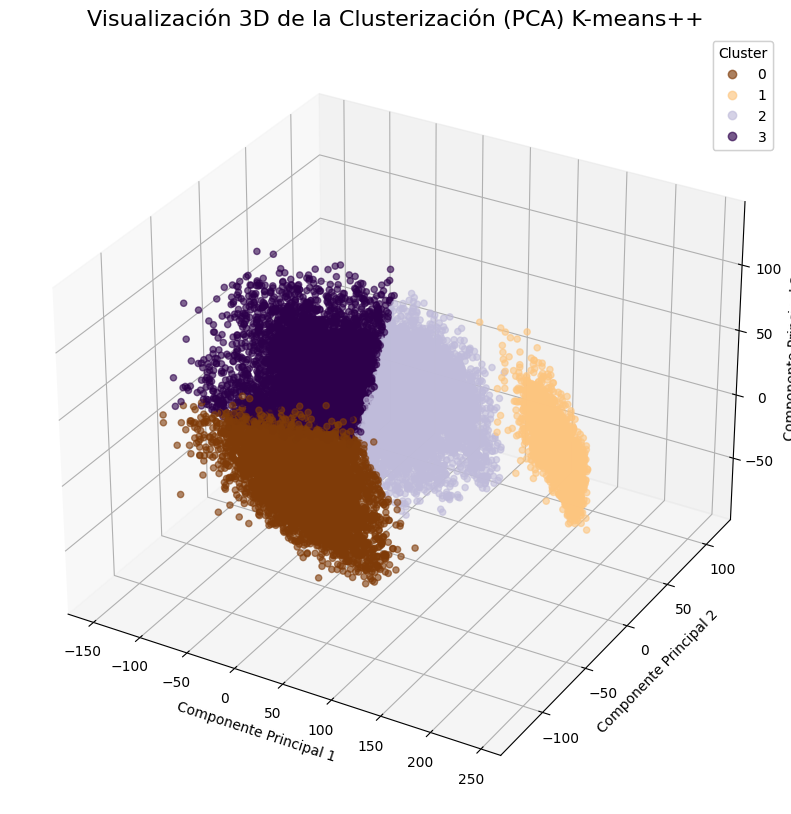

In [11]:
graficar_clusters_PCA3D_plus(cluster_kmeans_plus, 'K-means++')